einlesen von Daten

In [77]:
# reading file ue_example.csv from download folder
import pandas as pd
import os

# Get the home directory
home = os.path.expanduser("~")

# Construct the file path
file_path = os.path.join(home, "Downloads", "ue_example.csv")

# Read the CSV file and store it in a DataFrame
df = pd.read_csv(file_path)
# print(df.head())
# -*- coding: utf-8 -*-

Sortieren per Datum

In [78]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date') 
df.reset_index(drop=True, inplace=True)
# print(df.head())

Bereinigung

In [79]:
# remove duplicates
df = df.drop_duplicates(subset=['Date'])    
# remove dates older than 2016-01-01
df = df[df['Date'] >= '2016-01-01']
# print(df)
# update negative Price to positive
df.loc[df['Price'] < 0, 'Price'] = df['Price'].abs()
# print(df)

Anreichern der Daten

In [80]:
# add weekday column
df['Weekday'] = df['Date'].dt.day_name()
# print(df)

# Sales = Sum (lemon, orange)
df['Sales'] = df['Lemon'] + df['Orange']
# print(df[['Date', 'Lemon', 'Orange', 'Sales']].head())

# Revenue = Sales * Price
df['Revenue'] = df['Sales'] * df['Price']
df.reset_index(drop=True, inplace=True)
print(df[['Date', 'Weekday', 'Location', 'Lemon', 'Orange', 'Price', 'Sales', 'Revenue']])

# total sales lemon
total_lemon_sales = df['Lemon'].sum()
print("Total lemon sales:", total_lemon_sales)

# total sales orange
total_orange_sales = df['Orange'].sum()
print("Total orange sales:", total_orange_sales)

# total revenue
total_revenue = df['Revenue'].sum()
print("Total revenue:", total_revenue)
# df.dtypes   

         Date    Weekday Location  Lemon  Orange  Price  Sales  Revenue
0  2016-07-01     Friday     Park     97      67   0.25    164    41.00
1  2016-07-02   Saturday     Park     98      67   0.25    165    41.25
2  2016-07-03     Sunday     Park    110      77   0.25    187    46.75
3  2016-07-04     Monday    Beach    134      99   0.25    233    58.25
4  2016-07-05    Tuesday    Beach    159     118   0.25    277    69.25
5  2016-07-06  Wednesday    Beach    103      69   0.25    172    43.00
6  2016-07-07   Thursday    Beach    143     101   0.25    244    61.00
7  2016-07-08     Friday     Park     76      47   0.25    123    30.75
8  2016-07-09   Saturday    Beach    134      95   0.25    229    57.25
9  2016-07-10     Sunday    Beach    140      98   0.25    238    59.50
10 2016-07-11     Monday    Beach    162     120   0.25    282    70.50
11 2016-07-12    Tuesday    Beach    130      95   0.25    225    56.25
12 2016-07-13  Wednesday    Beach    109      75   0.25    184  

Visualisierung

Note: you may need to restart the kernel to use updated packages.


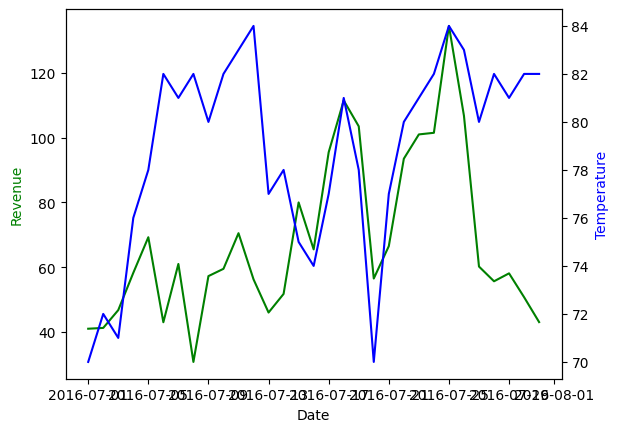

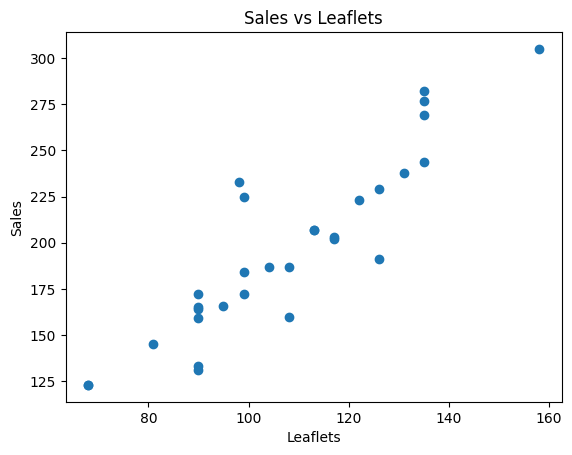

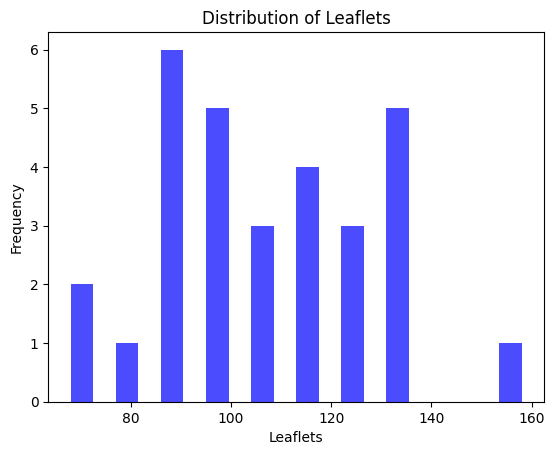

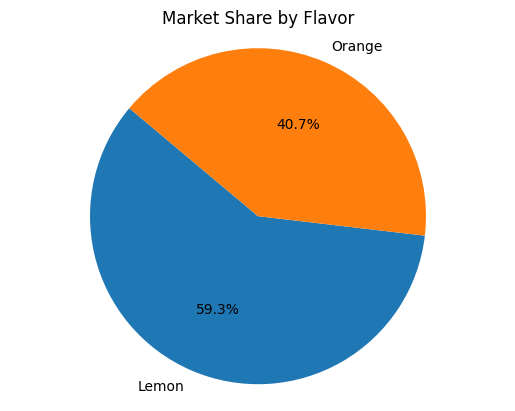

C:\Users\Stefan\AppData\Local\Temp\ipykernel_41712\1214297156.py:42: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df['Lemon'], df['Orange']], labels=['Lemon', 'Orange'])


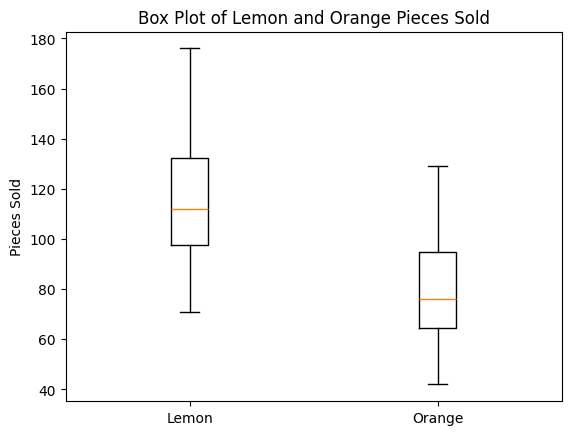

In [81]:
%pip install matplotlib
# visualization of revenue and temperature over time
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(df['Date'], df['Revenue'], 'g-')
ax2.plot(df['Date'], df['Temperature'], 'b-')
ax1.set_xlabel('Date')
ax1.set_ylabel('Revenue', color='g')
ax2.set_ylabel('Temperature', color='b')

# visualization of Sales vs Leaflets scatter plot
plt.figure()
plt.scatter(df['Leaflets'], df['Sales'])
plt.xlabel('Leaflets')
plt.ylabel('Sales')
plt.title('Sales vs Leaflets')
plt.show()

# Histogram of leaflets
plt.figure()
plt.hist(df['Leaflets'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Leaflets')
plt.ylabel('Frequency')
plt.title('Distribution of Leaflets')
plt.show()

# Marketshare for flavors
total_sales = df['Sales'].sum()
lemon_sales = df['Lemon'].sum()
orange_sales = df['Orange'].sum()
labels = ['Lemon', 'Orange']
sizes = [lemon_sales, orange_sales]
plt.figure()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Market Share by Flavor')
plt.show()

# Box Plot of Lemon and Orange Pieces Sold
plt.figure()
plt.boxplot([df['Lemon'], df['Orange']], labels=['Lemon', 'Orange'])
plt.ylabel('Pieces Sold')
plt.title('Box Plot of Lemon and Orange Pieces Sold')
plt.show()
